# Problem Statement

WHO is a specialized agency of the UN which is concerned with the world population health. Based upon the various parameters, WHO allocates budget for various areas to conduct various campaigns/initiatives to improve healthcare. Annual salary is an important variable which is considered to decide budget to be allocated for an area.  
  
We have a data, the extraction of which was done from 1994 Census dataset.  
  
The goal here is to build a binary model to predict whether the salary is >50K or <=50K.

## Data Dictionary

1. <b>age:</b> age  
2. <b>workclass:</b> workclass  
3. <b>education:</b> highest education  
4. <b>marrital status:</b> marital status  
5. <b>occupation:</b> occupation  
6. <b>sex:</b> sex  
7. <b>capital gain:</b> income from investment sources other than salary/wages  
8. <b>capital loss:</b> income from investment sources other than salary/wages  
9. <b>working hours:</b> nummber of working hours per week  
10. <b>salary:</b> salary  

###### Note: The Exploratory Data Analysis part has already been done in the student version of the notebook. This particular laboratory exercise is for the coding of Logistic Regression and Linear Discriminant Analysis and then evaluating the same using various model performance measures. Please do carefully take note of the questions which are not to be solved or discussed in the within laboratory session but is being given as a take-home assignment to the student. The students need to submit their completed notebook for grading purposes.

# Import the necessary libraries and load the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adult_data = pd.read_csv('adult.data.csv')
adult_data.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K


# Basic Exploratory Data Analysis

### Check for duplicate data across columns and drop those

In [3]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 5864
(32561, 10)


In [4]:
adult_data.drop_duplicates(inplace=True) 

In [5]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(26697, 10)


### Check for missing values and impute the missing values, if any is present.

In [6]:
adult_data.isna().sum()

age                       0
workclass                 0
education                 0
marrital status           0
occupation                0
sex                       0
capital gain              0
capital loss              0
working hours per week    0
salary                    0
dtype: int64

### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

In [7]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print(feature)
        print(adult_data[feature].value_counts())
        print('\n')

workclass
Private             17474
Self-emp-not-inc     2447
Local-gov            1980
?                    1519
State-gov            1246
Self-emp-inc         1089
Federal-gov           921
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


education
HS-grad         7815
Some-college    5692
Bachelors       4461
Masters         1606
Assoc-voc       1281
Assoc-acdm      1036
11th             987
10th             820
7th-8th          611
Prof-school      562
9th              502
Doctorate        399
12th             397
5th-6th          315
1st-4th          164
Preschool         49
Name: education, dtype: int64


marrital status
Married-civ-spouse       12679
Never-married             7698
Divorced                  3930
Separated                  978
Widowed                    971
Married-spouse-absent      418
Married-AF-spouse           23
Name: marrital status, dtype: int64


occupation
Prof-specialty       3703
Exec-managerial      3531
Sales       

#### Since there are a lot of values which are question marks ('?'), we can choose to encode them into a  new category or we can drop rows which have these unknown question marks ('?'). 
For this exercise we have converted them into a different category and have called it 'unknown'.

In [8]:
# Replace ? to new unknown category
adult_data.workclass=adult_data.workclass.str.replace('?', 'unknown')
adult_data.occupation = adult_data.occupation.str.replace('?', 'unknown')

In [9]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print(feature)
        print(adult_data[feature].value_counts())
        print('\n')

workclass
Private             17474
Self-emp-not-inc     2447
Local-gov            1980
unknown              1519
State-gov            1246
Self-emp-inc         1089
Federal-gov           921
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


education
HS-grad         7815
Some-college    5692
Bachelors       4461
Masters         1606
Assoc-voc       1281
Assoc-acdm      1036
11th             987
10th             820
7th-8th          611
Prof-school      562
9th              502
Doctorate        399
12th             397
5th-6th          315
1st-4th          164
Preschool         49
Name: education, dtype: int64


marrital status
Married-civ-spouse       12679
Never-married             7698
Divorced                  3930
Separated                  978
Widowed                    971
Married-spouse-absent      418
Married-AF-spouse           23
Name: marrital status, dtype: int64


occupation
Prof-specialty       3703
Exec-managerial      3531
Sales       

In [10]:
# ## Code to drop the rows containing ' ?' symbol


# # Copying the original data frame into a new frame
# df_1 = adult_data.copy(deep=True)
# print('Rows and Columns before dropping the ? symbol',df_1.shape,'\n')
# # Dropping the rows which has the ' ?' character
# df_1.drop(df_1[(df_1.workclass == ' ?')].index,inplace=True)
# df_1.drop(df_1[(df_1.occupation == ' ?')].index,inplace=True) 

# print('Rows and Columns after dropping the ? symbol',df_1.shape,'\n')

# # Checking whether the corresponding rows have been dropped or not
# for feature in df_1.columns: 
#     if df_1[feature].dtype == 'object': 
#         print(feature)
#         print(df_1[feature].value_counts())
#         print('\n')
        
# # print(df_1.head())

### Check for the basic measures of descriptive statistics.

In [11]:
adult_data.describe()

,age,capital gain,capital loss,working hours per week
count,26697.000000,26697.000000,26697.000000,26697.000000
mean,39.987489,1304.600929,105.699330,40.852530
std,13.691269,8111.031099,441.214823,13.114255
min,17.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,38.000000
50%,39.000000,0.000000,0.000000,40.000000
75%,49.000000,0.000000,0.000000,46.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Check the spread of the data using boxplot for the continuous variables.

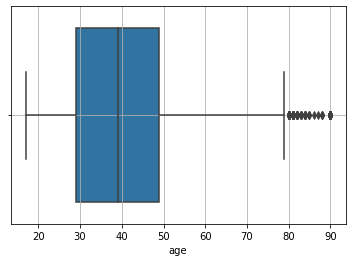

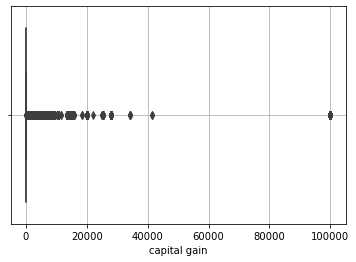

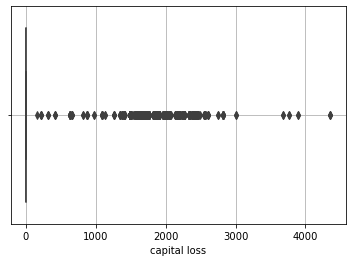

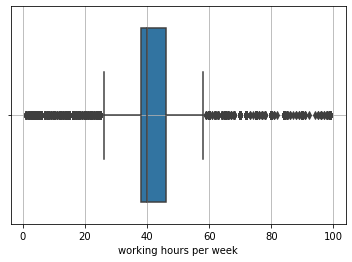

In [12]:
cols = ['age','capital gain','capital loss','working hours per week']
for i in cols:
    sns.boxplot(adult_data[i],whis=1.5)
    plt.grid()
    plt.show();

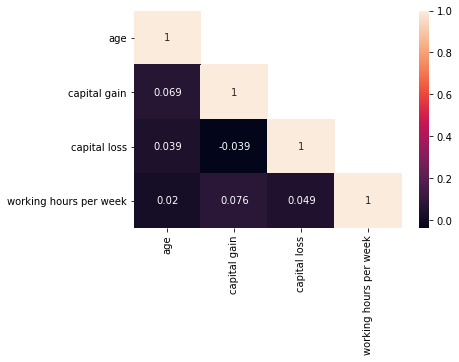

In [13]:
sns.heatmap(adult_data.corr(), annot=True,mask=np.triu(adult_data.corr(),+1));

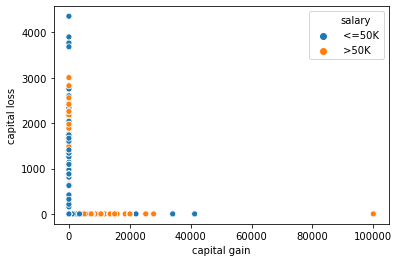

In [14]:
sns.scatterplot(x='capital gain',y='capital loss',data=adult_data,hue='salary')

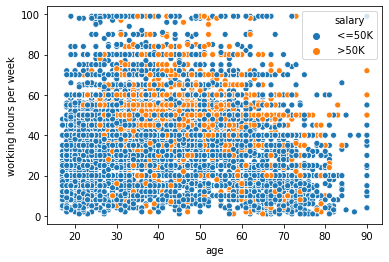

In [15]:
sns.scatterplot(x='age',y='working hours per week',data=adult_data,hue='salary')

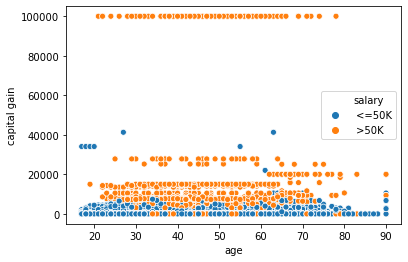

In [16]:
sns.scatterplot(x='age',y='capital gain',data=adult_data,hue='salary')

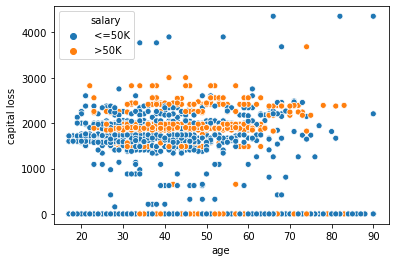

In [17]:
sns.scatterplot(x='age',y='capital loss',data=adult_data,hue='salary')

Dropping the variables of capital gain and capital loss as the majority of the values are zero.

In [18]:
adult_data.drop(labels=['capital gain','capital loss'],axis=1,inplace=True)
adult_data.head()

,age,workclass,education,marrital status,occupation,sex,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,<=50K


### Treating the outliers at 1.5 * IQR (Inter-Quartile Range). 
For this exercises, we are not treating the outliers. But please do play around with the data and try out such treatments.

In [19]:
# # Defining a function for getting the Upper and Lower limt acceptance of the outliers at 1.5*IQR. 
# # We can choose to treat the outliers at 3*IQR as well

# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range

In [20]:
## This is a loop to treat outliers for all the non-'object' type varible

# for column in adult_data.columns:
#     if adult_data[column].dtype != 'object': 
#         lr,ur=remove_outlier(adult_data[column])
#         adult_data[column]=np.where(adult_data[column]>ur,ur,adult_data[column])
#         adult_data[column]=np.where(adult_data[column]<lr,lr,adult_data[column])

### Checking for Correlations. Print the correlation matrix and the correlation heatmap.

In [21]:
adult_data.corr()

,age,working hours per week
age,1.000000,0.019571
working hours per week,0.019571,1.000000


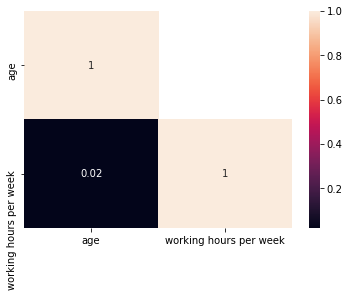

In [22]:
sns.heatmap(adult_data.corr(), annot=True,mask=np.triu(adult_data.corr(),+1));

### Plot a series of scatterplots between the continuous independent variables keeping the target variable as a hue.

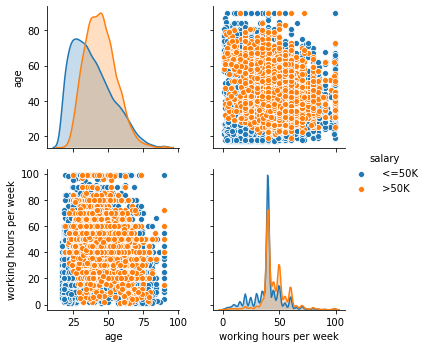

In [23]:
# Pairplot using sns
sns.pairplot(adult_data ,diag_kind='kde' ,hue='salary');

### Change the names of the variables in a suitable way for building the logistic regression model.

In [24]:
adult_data.rename(columns = {'working hours per week':'working_hours_per_week','marrital status':'marritalstatus'}, inplace = True)

### Treat the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.

In [25]:
adult_data.head()

,age,workclass,education,marritalstatus,occupation,sex,working_hours_per_week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,<=50K


In [26]:
## We are coding up the 'education' variable in an ordinal manner

adult_data['education']=np.where(adult_data['education'] =='Preschool', '1', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='1st-4th', '2', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='5th-6th', '3', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='7th-8th', '4', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='9th', '5', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='10th', '6', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='11th', '7', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='12th', '8', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='HS-grad', '9', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Prof-school', '9', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Assoc-acdm', '10', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Assoc-voc', '11', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Some-college', '12', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Bachelors', '13', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Masters', '14', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Doctorate', '15', adult_data['education'])

In [27]:
## We are grouping certain types of 'workclass' under different categories

adult_data['workclass']=np.where(adult_data['workclass'] =='Federal-gov', 'Government', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Local-gov', 'Government', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='State-gov', 'Government', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Self-emp-inc', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Self-emp-not-inc', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='unknown', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Without-pay', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Never-worked', 'Others', adult_data['workclass'])

In [28]:
## We are grouping certain types of 'marritalstatus' under different categories

adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Divorced', 'CurrentlySingle', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Separated', 'CurrentlySingle', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Never-married', 'CurrentlySingle', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Widowed', 'CurrentlySingle', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Married-civ-spouse', 'Married', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Married-spouse-absent', 'Married', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Married-AF-absent', 'Married', adult_data['marritalstatus'])
adult_data['marritalstatus']=np.where(adult_data['marritalstatus'] =='Married-AF-spouse', 'Married', adult_data['marritalstatus'])

In [29]:
## We are grouping certain types of 'occupation' under different categories

adult_data['occupation']=np.where(adult_data['occupation'] =='Adm-clerical', 'WhiteCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Exec-managerial', 'WhiteCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Craft-repair', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Handlers-cleaners', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Transport-moving', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Farming-fishing', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Machine-op-inspct', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Tech-support', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Other-service', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Protective-serv', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Priv-house-serv', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Prof-specialty', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='unknown', 'Unknown_Others', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Armed-Forces', 'Unknown_Others', adult_data['occupation'])

In [30]:
adult_data.head()

,age,workclass,education,marritalstatus,occupation,sex,working_hours_per_week,salary
0,39,Government,13,CurrentlySingle,WhiteCollar,Male,40,<=50K
1,50,Others,13,Married,WhiteCollar,Male,13,<=50K
2,38,Private,9,CurrentlySingle,BlueCollar,Male,40,<=50K
3,53,Private,7,Married,BlueCollar,Male,40,<=50K
4,28,Private,13,Married,Service,Female,40,<=50K


In [31]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     26697 non-null  int64 
 1   workclass               26697 non-null  object
 2   education               26697 non-null  object
 3   marritalstatus          26697 non-null  object
 4   occupation              26697 non-null  object
 5   sex                     26697 non-null  object
 6   working_hours_per_week  26697 non-null  int64 
 7   salary                  26697 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.8+ MB


In [32]:
## Converting the education variable to numeric

adult_data['education'] = adult_data['education'].astype('int64')
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     26697 non-null  int64 
 1   workclass               26697 non-null  object
 2   education               26697 non-null  int64 
 3   marritalstatus          26697 non-null  object
 4   occupation              26697 non-null  object
 5   sex                     26697 non-null  object
 6   working_hours_per_week  26697 non-null  int64 
 7   salary                  26697 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.8+ MB


In [33]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [34]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to <=50k and 1 to >50k

adult_data['salary'] = LE.fit_transform(adult_data['salary'])
adult_data.head()

,age,workclass,education,marritalstatus,occupation,sex,working_hours_per_week,salary
0,39,Government,13,CurrentlySingle,WhiteCollar,Male,40,0
1,50,Others,13,Married,WhiteCollar,Male,13,0
2,38,Private,9,CurrentlySingle,BlueCollar,Male,40,0
3,53,Private,7,Married,BlueCollar,Male,40,0
4,28,Private,13,Married,Service,Female,40,0


In [35]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     26697 non-null  int64 
 1   workclass               26697 non-null  object
 2   education               26697 non-null  int64 
 3   marritalstatus          26697 non-null  object
 4   occupation              26697 non-null  object
 5   sex                     26697 non-null  object
 6   working_hours_per_week  26697 non-null  int64 
 7   salary                  26697 non-null  int32 
dtypes: int32(1), int64(3), object(4)
memory usage: 1.7+ MB


In [36]:
## Converting the other 'object' type variables as dummy variables
adult_data_dummy = pd.get_dummies(adult_data,drop_first=True)
adult_data_dummy.head()

,age,education,working_hours_per_week,salary,workclass_Others,workclass_Private,marritalstatus_Married,occupation_Sales,occupation_Service,occupation_Unknown_Others,occupation_WhiteCollar,sex_Male
0,39,13,40,0,0,0,0,0,0,0,1,1
1,50,13,13,0,1,0,1,0,0,0,1,1
2,38,9,40,0,0,1,0,0,0,0,0,1
3,53,7,40,0,0,1,1,0,0,0,0,1
4,28,13,40,0,0,1,1,0,1,0,0,0


In [37]:
adult_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        26697 non-null  int64
 1   education                  26697 non-null  int64
 2   working_hours_per_week     26697 non-null  int64
 3   salary                     26697 non-null  int32
 4   workclass_Others           26697 non-null  uint8
 5   workclass_Private          26697 non-null  uint8
 6   marritalstatus_Married     26697 non-null  uint8
 7   occupation_Sales           26697 non-null  uint8
 8   occupation_Service         26697 non-null  uint8
 9   occupation_Unknown_Others  26697 non-null  uint8
 10  occupation_WhiteCollar     26697 non-null  uint8
 11  sex_Male                   26697 non-null  uint8
dtypes: int32(1), int64(3), uint8(8)
memory usage: 1.1 MB


# Q1. Model 1 - Build the Logistic Regression Model using all the variables on the full data and check the summary statistics of the model. - 1 point.

In [38]:
import statsmodels.formula.api as sm

In [39]:
adult_data_dummy.columns

Index(['age', 'education', 'working_hours_per_week', 'salary',
       'workclass_Others', 'workclass_Private', 'marritalstatus_Married',
       'occupation_Sales', 'occupation_Service', 'occupation_Unknown_Others',
       'occupation_WhiteCollar', 'sex_Male'],
      dtype='object')

In [40]:
formula_1='salary~age+education+working_hours_per_week+workclass_Others+workclass_Private+marritalstatus_Married+occupation_Sales+occupation_Service+occupation_Unknown_Others+occupation_WhiteCollar+sex_Male'

In [41]:
Logistic_1 = sm.logit(formula=formula_1,data=adult_data_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.414212
         Iterations 7


In [42]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                26697
Model:                          Logit   Df Residuals:                    26685
Method:                           MLE   Df Model:                           11
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.2812
Time:                        16:51:29   Log-Likelihood:                -11058.
converged:                       True   LL-Null:                       -15385.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.4738      0.142    -59.616      0.000      -8.752      -8.195
age                           0.0285      0.001     20.352      0.000       0.026       0.031
education                     0.2561      0.008     33.473      0.000       0.241       0.271
working_hours_per_week        0.0321      0.001     22.749      0.000       0.029       0.035
workclass_Others             -0.0352      0.060     -0.586      0.558      -0.153       0.083
workclass_Private             0.0870      0.047      1.841      0.066      -0.006       0.180
marritalstatus_Married        2.0895      0.042     49.888      0.000       2.007       2.172
occupation_Sales              0.4917      0.059      8.289      0.000       0.375       0.608
occupation_Service            0.7207      0.048     14.896      0.000       0.626       0.816
occupation_Unknown_Others    -0.1461      0.104     -1.404      0.160      -0.350       0.058
occupation_WhiteCollar        0.8179      0.049     16.684      0.000       0.722       0.914
sex_Male                      0.3943      0.045      8.744      0.000       0.306       0.483
=============================================================================================
"""

In [2]:
1 - (11058/15385)

0.28124796880077996

# Q2. Model 2 - Drop the variable with the highest p-value (least significant variable) in the first iteration of the model. Build a second iteration of the model on the full data and check the summary statistics. - 1 point

In [43]:
formula_2='salary~age+education+working_hours_per_week+workclass_Private+marritalstatus_Married+occupation_Sales+occupation_Service+occupation_Unknown_Others+occupation_WhiteCollar+sex_Male'

In [44]:
Logistic_2 = sm.logit(formula=formula_2,data=adult_data_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.414219
         Iterations 7


In [45]:
Logistic_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                26697
Model:                          Logit   Df Residuals:                    26686
Method:                           MLE   Df Model:                           10
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.2812
Time:                        16:51:29   Log-Likelihood:                -11058.
converged:                       True   LL-Null:                       -15385.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.4877      0.140    -60.544      0.000      -8.762      -8.213
age                           0.0284      0.001     20.370      0.000       0.026       0.031
education                     0.2563      0.008     33.567      0.000       0.241       0.271
working_hours_per_week        0.0320      0.001     22.828      0.000       0.029       0.035
workclass_Private             0.1045      0.037      2.853      0.004       0.033       0.176
marritalstatus_Married        2.0886      0.042     49.902      0.000       2.007       2.171
occupation_Sales              0.4886      0.059      8.269      0.000       0.373       0.604
occupation_Service            0.7249      0.048     15.154      0.000       0.631       0.819
occupation_Unknown_Others    -0.1622      0.100     -1.616      0.106      -0.359       0.035
occupation_WhiteCollar        0.8198      0.049     16.756      0.000       0.724       0.916
sex_Male                      0.3934      0.045      8.730      0.000       0.305       0.482
=============================================================================================
"""

# Q3. Model 3 - Drop the variable which has the highest p-value (least significant variable) in the second iteration of the model. Build a third iteration of the model on the full data and check the summary statistics. - 1 point

In [46]:
formula_3='salary~age+education+working_hours_per_week+workclass_Private+marritalstatus_Married+occupation_Sales+occupation_Service+occupation_WhiteCollar+sex_Male'

In [47]:
Logistic_3 = sm.logit(formula=formula_3,data=adult_data_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.414268
         Iterations 7


In [48]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                26697
Model:                          Logit   Df Residuals:                    26687
Method:                           MLE   Df Model:                            9
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.2811
Time:                        16:51:30   Log-Likelihood:                -11060.
converged:                       True   LL-Null:                       -15385.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.5208      0.139    -61.432      0.000      -8.793      -8.249
age                        0.0282      0.001     20.332      0.000       0.025       0.031
education                  0.2557      0.008     33.550      0.000       0.241       0.271
working_hours_per_week     0.0323      0.001     23.327      0.000       0.030       0.035
workclass_Private          0.1193      0.035      3.363      0.001       0.050       0.189
marritalstatus_Married     2.0898      0.042     49.951      0.000       2.008       2.172
occupation_Sales           0.5078      0.058      8.766      0.000       0.394       0.621
occupation_Service         0.7480      0.046     16.360      0.000       0.658       0.838
occupation_WhiteCollar     0.8421      0.047     17.918      0.000       0.750       0.934
sex_Male                   0.3990      0.045      8.891      0.000       0.311       0.487
==========================================================================================
"""

# Q4. Split the data into training (70%) and test (30%) in such a way that the uniformity in the training as well as test set is maintained every time the code is run. Check the whether the proportion of the different classes within the target variable is same across train and test. - 0.5 point

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Train,Test = train_test_split(adult_data_dummy,test_size=0.3,random_state=123,stratify=adult_data_dummy['salary'])

In [51]:
Train.shape

(18687, 12)

In [52]:
Test.shape

(8010, 12)

In [53]:
Train['salary'].value_counts(1)

0    0.736876
1    0.263124
Name: salary, dtype: float64

In [54]:
Test['salary'].value_counts(1)

0    0.736954
1    0.263046
Name: salary, dtype: float64

# Q5. Build the models 1,2 and 3 on the training data, check the accuracy score of each of the models on the training data and use those models to predict the classes and the corresponding probabilities on the test data. Use 0.5 as the probability cut-off for predicting the classes - 1.5 points (0.5 point for each  model building and prediction)
###### Note: The students can choose to use 'statsmodels' to perform the corresponding codes as well.

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [57]:
model_1 = LR.fit(Train[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary'])

In [ ]:
model_1.

In [58]:
print('Accuracy Score of Model 1:',model_1.score(Train[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary']))

Accuracy Score of Model 1: 0.7984695242682078


### Model 1 - Predicting the classes and the probabilities on the Test Data

In [59]:
model_1_test_class = model_1.predict(Test[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])
model_1_test_probabilities = model_1.predict_proba(Test[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])

In [60]:
model_1_test_probabilities

array([[0.51440425, 0.48559575],
       [0.36013287, 0.63986713],
       [0.92153197, 0.07846803],
       ...,
       [0.89935318, 0.10064682],
       [0.93587896, 0.06412104],
       [0.55139793, 0.44860207]])

### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [61]:
model_2 = LR.fit(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary'])

In [62]:
print('Accuracy Score of Model 2:',model_2.score(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary']))

Accuracy Score of Model 2: 0.7977203403435543


### Model 2 - Predicting the classes and the probabilities on the Test Data

In [63]:
model_2_test_class = model_2.predict(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])
model_2_test_probabilities = model_2.predict_proba(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])

### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [64]:
model_3 = LR.fit(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']],Train['salary'])

In [65]:
print('Accuracy Score of Model 3:',model_3.score(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']],Train['salary']))

Accuracy Score of Model 3: 0.7974527746561781


### Model 3 - Predicting the classes and the probabilities on the Test Data

In [66]:
model_3_test_class = model_3.predict(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']])
model_3_test_probabilities = model_3.predict_proba(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']])

# Q6. Evaluate the three models on the test data using the various statistics of the confusion matrix. - 1 point

In [67]:
from sklearn import metrics

### Confusion Matrix summary statistics Evaluation on the Test Data

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

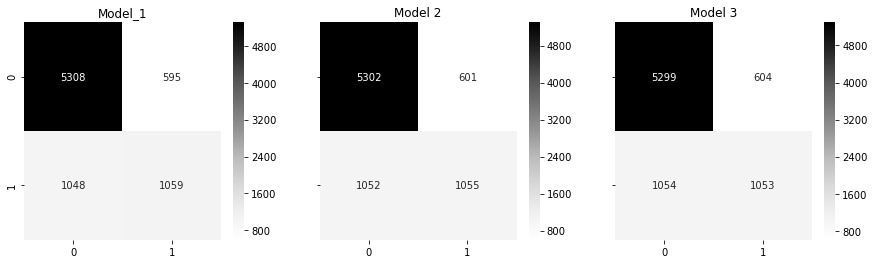

In [69]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['salary'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['salary'],model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['salary'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');



In [70]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['salary'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['salary'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['salary'],model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 1
True Negative: 5308 
False Positives: 595 
False Negatives: 1048 
True Positives: 1059 


Model 2
True Negative: 5302 
False Positives: 601 
False Negatives: 1052 
True Positives: 1055 


Model 3
True Negative: 5299 
False Positives: 604 
False Negatives: 1054 
True Positives: 1053


In [71]:
print('Model 1')
print(metrics.classification_report(Test['salary'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['salary'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['salary'],model_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5903
           1       0.64      0.50      0.56      2107

    accuracy                           0.79      8010
   macro avg       0.74      0.70      0.71      8010
weighted avg       0.78      0.79      0.79      8010
 

Model 2
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      5903
           1       0.64      0.50      0.56      2107

    accuracy                           0.79      8010
   macro avg       0.74      0.70      0.71      8010
weighted avg       0.78      0.79      0.79      8010
 

Model 3
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5903
           1       0.64      0.50      0.56      2107

    accuracy                           0.79      8010
   macro avg       0.73      0.70      0.71      8010
weighted avg       0.78      0.79      0.78   

# Q7. Check the summary statistics of the AUC-ROC curve for all the three Logistic Regression Models built. This is for the test data. - 1 point

#### Note: This question is part of the take-home assignment. This question should not be discussed in the laboratory session. The students are expected to solve this question on their own and then submit. The code give is just for your reference.

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.84813


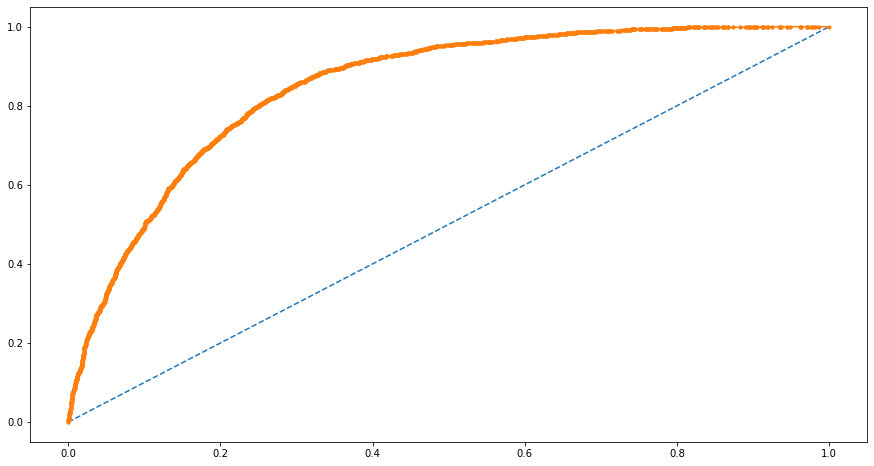

Model 2 AUC: 0.84845


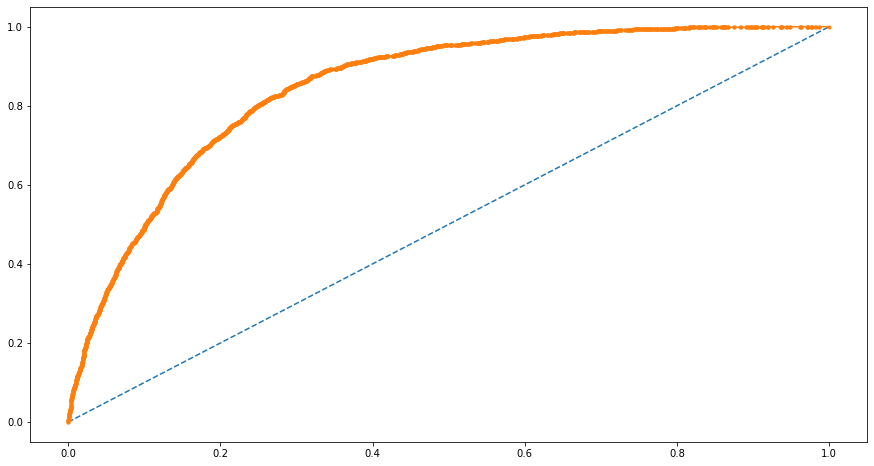

Model 3 AUC: 0.84862


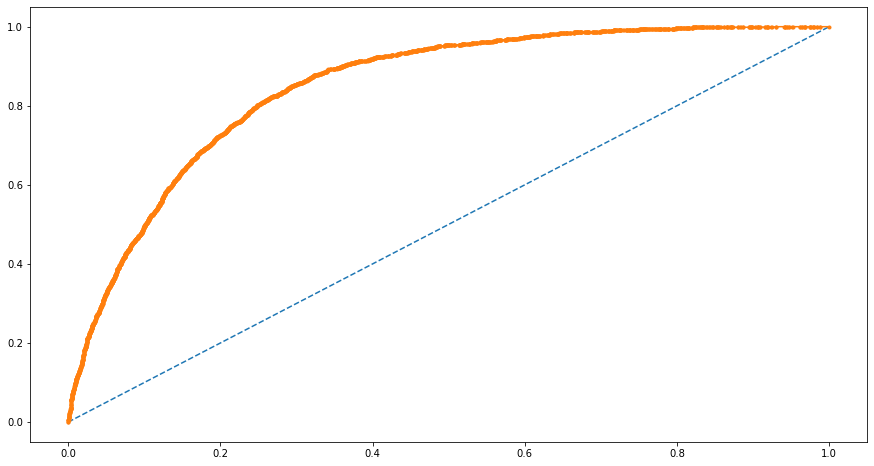

In [73]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['salary'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['salary'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['salary'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['salary'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['salary'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['salary'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Build three Linear Discriminant Analysis models [using the variables used in the three different models of Logistic Regression] on the training data, check their accuracy scores on the training data and use those models to predict the classes and the corresponding probabilities on the test data. - 1.5 points (0.5 point for each  model building and prediction)
###### Note: For this particular exercise the students can use the Z-Score cut-off method for getting the classes or they could be using the 'decision function'  command. The students can choose to code it up in a way that they feel more comfortable.

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
LDA = LinearDiscriminantAnalysis()

### Model 1 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [76]:
model_1_LDA = LDA.fit(Train[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary'])

In [77]:
print('Accuracy Score of LDA Model 1:',model_1_LDA.score(Train[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary']))

Accuracy Score of LDA Model 1: 0.7947236046449403


### Model 1 - Predicting the classes and the probabilities on the Test Data for the LDA model

In [78]:
model_1_LDA_test_class = model_1_LDA.predict(Test[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])
model_1_LDA_test_probabilities = model_1_LDA.predict_proba(Test[['age','education','working_hours_per_week','workclass_Others','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])

### Model 2 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [79]:
model_2_LDA = LDA.fit(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary'])

In [80]:
print('Accuracy Score of LDA Model 2:',model_2_LDA.score(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']],Train['salary']))

Accuracy Score of LDA Model 2: 0.7944025258200889


### Model 2 - Predicting the classes and the probabilities on the Test Data for the LDA model

In [81]:
model_2_LDA_test_class = model_2_LDA.predict(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])
model_2_LDA_test_probabilities = model_2_LDA.predict_proba(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_Unknown_Others','occupation_WhiteCollar','sex_Male']])

### Model 3 - Building the LDA model on the Training Data and checking the Accuracy score on the training data.

In [82]:
model_3_LDA = LDA.fit(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']],Train['salary'])

In [83]:
print('Accuracy Score of LDA Model 2:',model_3_LDA.score(Train[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']],Train['salary']))

Accuracy Score of LDA Model 2: 0.7952052228822176


### Model 3 - Predicting the classes and the probabilities on the Test Data for the LDA model

In [84]:
model_3_LDA_test_class = model_3_LDA.predict(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']])
model_3_LDA_test_probabilities = model_3_LDA.predict_proba(Test[['age','education','working_hours_per_week','workclass_Private','marritalstatus_Married','occupation_Sales','occupation_Service','occupation_WhiteCollar','sex_Male']])

# Evaluate the three LDA models on the test data using the various statistics of the confusion matrix and the AUC-ROC curve. - 1 point (0.5 each for all the three confusion matrix summary statistics evaluation and the three AUC-ROC curve evaluation)
###### Note: The entire LDA model evaluation part should be done by the students as a take-home exercise and then submitted later along with the rest of the notebook.

### Confusion Matrix Summary Statistics evaluation on the Test Data

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

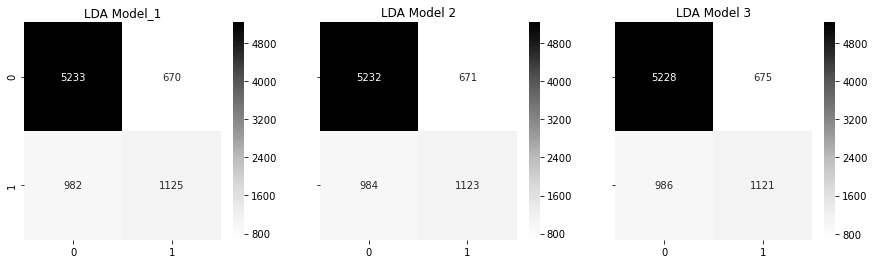

In [86]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['salary'],model_1_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['salary'],model_2_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['salary'],model_3_LDA_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('LDA Model 3');



In [87]:
print('LDA Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['salary'],model_1_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['salary'],model_2_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['salary'],model_3_LDA_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

LDA Model 1
True Negative: 5233 
False Positives: 670 
False Negatives: 982 
True Positives: 1125 


LDA Model 2
True Negative: 5232 
False Positives: 671 
False Negatives: 984 
True Positives: 1123 


LDA Model 3
True Negative: 5228 
False Positives: 675 
False Negatives: 986 
True Positives: 1121


In [88]:
print('LDA Model 1')
print(metrics.classification_report(Test['salary'],model_1_LDA_test_class),'\n')

print('LDA Model 2')
print(metrics.classification_report(Test['salary'],model_2_LDA_test_class),'\n')

print('LDA Model 3')
print(metrics.classification_report(Test['salary'],model_3_LDA_test_class))

LDA Model 1
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5903
           1       0.63      0.53      0.58      2107

    accuracy                           0.79      8010
   macro avg       0.73      0.71      0.72      8010
weighted avg       0.79      0.79      0.79      8010
 

LDA Model 2
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5903
           1       0.63      0.53      0.58      2107

    accuracy                           0.79      8010
   macro avg       0.73      0.71      0.72      8010
weighted avg       0.78      0.79      0.79      8010
 

LDA Model 3
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5903
           1       0.62      0.53      0.57      2107

    accuracy                           0.79      8010
   macro avg       0.73      0.71      0.72      8010
weighted avg       0.78      0.79 

### AUC-ROC summary statistics Evaluation on the Test Data. Calculate the AUC-ROC curves and the AUC values.

LDA Model 1 AUC: 0.84774


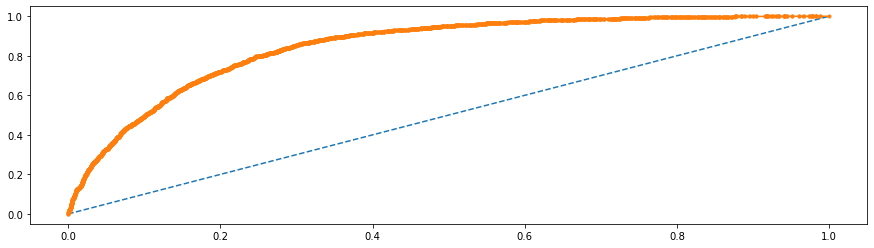

LDA Model 2 AUC: 0.84790


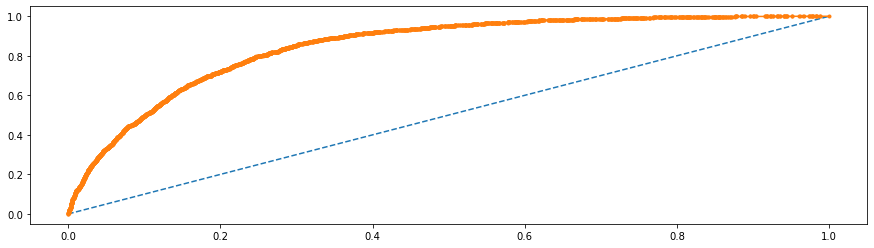

LDA Model 3 AUC: 0.84787


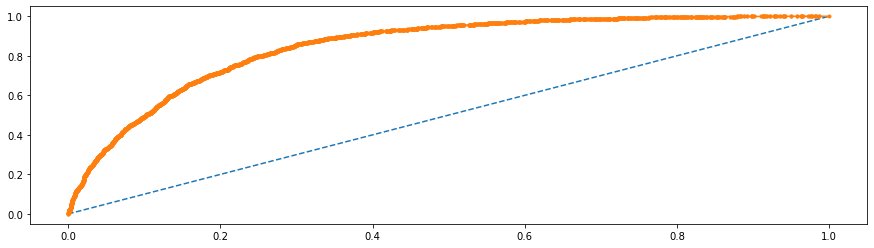

In [89]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['salary'],model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['salary'],model_1_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['salary'],model_2_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['salary'],model_2_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['salary'],model_3_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['salary'],model_3_LDA_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Among the 6 models thus built, which model performs the most optimally based on the model evaluation metrics? - 0.5 point
#### Note: This question is part of the take-home assignment. This question will not be discussed in the laboratory session. Please do solve this question and submit your laboratory assignment in the link provided by your Program Manager.

# END